>
> # MaaS Sim tutorial
>
> ##External functionalities
>
-----
test how vehicle and driver rejects requests and how to control it via extrnal functions passed to simulator

import simulator

In [1]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import random

In [17]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.traveller import travellerEvent
from MaaSSim.driver import driverEvent
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.utils import dummy_False
import logging

In [3]:
params = get_config('../../data/config/default.json')  # load configuration

In [25]:
params.times.patience = 3600  # 1 hour of simulation
params.simTime = 1  # 1 hour of simulation
params.nP = 100  # reuqests (and passengers)
params.nV = 100  # vehicles
params.nD = 1

functions to reject with probability of 20 and 80% respectively

In [7]:
def rand_reject8(**kwargs):
    return random.random()>=0.2

def rand_reject2(**kwargs):
    return random.random()>=0.8

In [26]:
params = get_config('../../data/config/delft.json')  # load configuration
params.times.patience = 3600  # 1 hour of simulation
params.simTime = 1  # 1 hour of simulation
params.nP = 100  # reuqests (and passengers)
params.nV = 100  # vehicles
params.nD = 1

for i in range(10):
    sim2 = simulate(params=params, f_trav_mode=dummy_False,f_driver_decline=dummy_False,f_platform_choice=dummy_False, logger_level = logging.CRITICAL)
    sim2.make_and_run(f_trav_mode=dummy_False,
                          f_driver_decline=rand_reject8,
                          f_platform_choice=dummy_False)
    sim2.make_and_run(f_trav_mode=rand_reject8,
                          f_driver_decline=dummy_False,
                          f_platform_choice=dummy_False)
    sim2.make_and_run(f_trav_mode=rand_reject8,
                          f_driver_decline=rand_reject8,
                          f_platform_choice=dummy_False)
    

['STARTS_DAY' 'REQUESTS_RIDE' 'RECEIVES_OFFER' 'ACCEPTS_OFFER'
 'ARRIVES_AT_PICKUP' 'MEETS_DRIVER_AT_PICKUP' 'DEPARTS_FROM_PICKUP']


AssertionError: 

> no rejects

12-10-20 10:08:28-WARNING-Setting up 1h simulation at 2020-10-12 09:38:56 for 100 vehicles and 100 passengers in Nootdorp, Netherlands
12-10-20 10:08:28-INFO--------------------	Starting simulation	-------------------
12-10-20 10:08:28-INFO-pax    1  got to dest at                           2020-10-12 09:41:37
12-10-20 10:08:28-INFO-pax    2  got to dest at                           2020-10-12 09:42:22
12-10-20 10:08:28-INFO-pax    3  got to dest at                           2020-10-12 09:44:03
12-10-20 10:08:28-INFO-pax    5  got to dest at                           2020-10-12 09:44:45
12-10-20 10:08:28-INFO-pax    7  got to dest at                           2020-10-12 09:45:38
12-10-20 10:08:28-INFO-pax    4  got to dest at                           2020-10-12 09:45:46
12-10-20 10:08:28-INFO-pax    0  got to dest at                           2020-10-12 09:45:49
12-10-20 10:08:28-INFO-pax    8  got to dest at                           2020-10-12 09:45:50
12-10-20 10:08:28-INFO-pax    

<AxesSubplot:ylabel='event'>

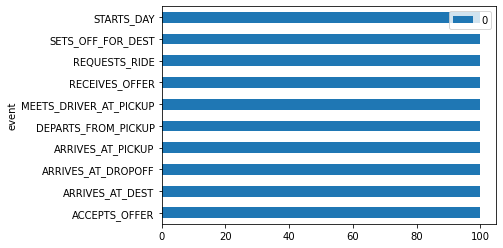

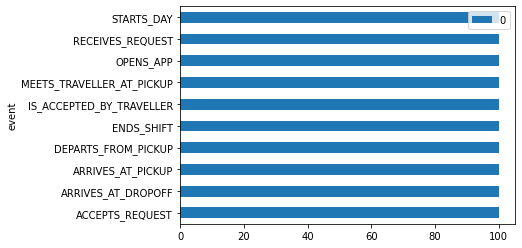

In [8]:
sim = simulate(params = params)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> veh rejects with prob. 20%

12-10-20 10:08:35-WARNING-Setting up 1h simulation at 2020-10-12 09:38:37 for 100 vehicles and 100 passengers in Nootdorp, Netherlands
12-10-20 10:08:35-INFO--------------------	Starting simulation	-------------------
12-10-20 10:08:35-WARNING-pax    1  got rejected by vehicle 76               2020-10-12 09:39:28
12-10-20 10:08:35-WARNING-pax    1  got rejected by vehicle 76               2020-10-12 09:39:28
12-10-20 10:08:35-WARNING-pax    1  got rejected by vehicle 76               2020-10-12 09:39:28
12-10-20 10:08:35-WARNING-pax    1  got rejected by vehicle 76               2020-10-12 09:39:28
12-10-20 10:08:35-WARNING-pax    1  got rejected by vehicle 76               2020-10-12 09:39:28
12-10-20 10:08:35-WARNING-pax    1  got rejected by vehicle 76               2020-10-12 09:39:28
12-10-20 10:08:35-WARNING-pax    2  got rejected by vehicle 37               2020-10-12 09:40:28
12-10-20 10:08:35-WARNING-pax    2  got rejected by vehicle 37               2020-10-12 09:40:28
12-10-

<AxesSubplot:ylabel='event'>

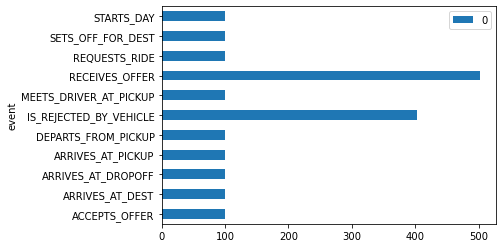

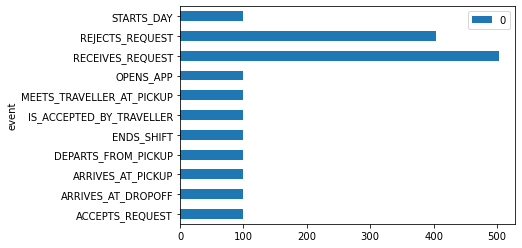

In [9]:
sim = simulate(params = params, f_driver_decline = rand_reject8)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> traveller rejects with prob. 20%

12-10-20 10:08:51-WARNING-Setting up 1h simulation at 2020-10-12 09:39:22 for 100 vehicles and 100 passengers in Nootdorp, Netherlands
12-10-20 10:08:51-INFO--------------------	Starting simulation	-------------------
12-10-20 10:08:51-WARNING-pax    0  got rejected by vehicle 1                2020-10-12 09:39:22
12-10-20 10:08:51-INFO-pax    0  rejected vehicle 1                       2020-10-12 09:39:37
12-10-20 10:08:51-WARNING-pax    1  got rejected by vehicle 79               2020-10-12 09:39:57
12-10-20 10:08:51-WARNING-pax    1  got rejected by vehicle 79               2020-10-12 09:39:57
12-10-20 10:08:51-WARNING-pax    2  got rejected by vehicle 15               2020-10-12 09:40:07
12-10-20 10:08:51-WARNING-pax    2  got rejected by vehicle 15               2020-10-12 09:40:07
12-10-20 10:08:51-WARNING-pax    2  got rejected by vehicle 15               2020-10-12 09:40:07
12-10-20 10:08:51-WARNING-pax    2  got rejected by vehicle 15               2020-10-12 09:40:07
12-10-20 

<AxesSubplot:ylabel='event'>

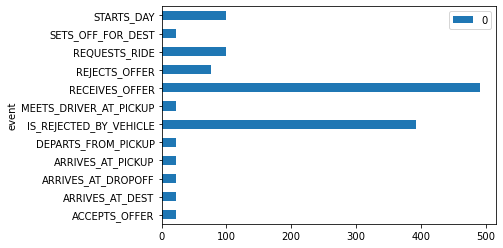

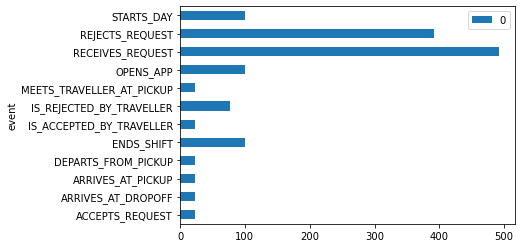

In [10]:
sim =simulate(params = params, f_trav_mode = rand_reject8)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> both reject with prob. 20%

09-10-20 10:46:22-WARNING-Setting up 1h simulation at 2020-10-09 10:20:34 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:23-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:23-WARNING-pax    1  got rejected by vehicle 10               2020-10-09 10:22:36
09-10-20 10:46:23-WARNING-pax    2  got rejected by vehicle 9                2020-10-09 10:27:06
09-10-20 10:46:23-INFO-pax    2  rejected vehicle 9                       2020-10-09 10:27:21
09-10-20 10:46:23-INFO-pax    1  got to dest at                           2020-10-09 10:29:20
09-10-20 10:46:23-INFO-pax    0  got to dest at                           2020-10-09 10:31:19
09-10-20 10:46:23-INFO-pax    3  got to dest at                           2020-10-09 10:38:58
09-10-20 10:46:23-WARNING-pax    5  got rejected by vehicle 8                2020-10-09 10:42:53
09-10-20 10:46:23-INFO-pax    5  rejected vehicle 8                       2020-10-09 10:43:08
09-10-20 10:46:23-INFO-

<AxesSubplot:ylabel='event'>

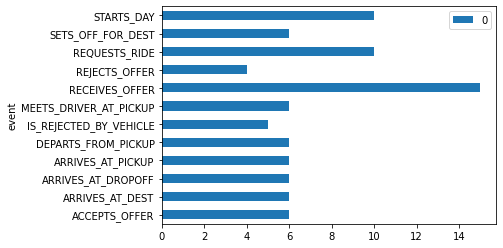

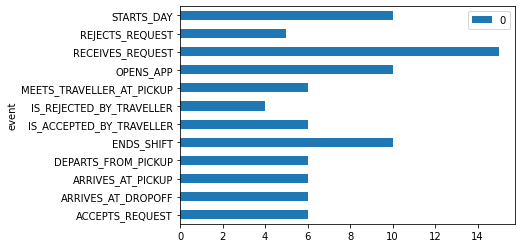

In [9]:
sim = simulate(params = params, f_driver_decline = rand_reject8, f_trav_mode = rand_reject8)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

> both reject with prob. 80%

09-10-20 10:46:24-WARNING-Setting up 1h simulation at 2020-10-09 10:24:34 for 10 vehicles and 10 passengers in Nootdorp, Netherlands
09-10-20 10:46:24-INFO--------------------	Starting simulation	-------------------
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20 10:46:24-WARNING-pax    0  got rejected by vehicle 1                2020-10-09 10:24:34
09-10-20

<AxesSubplot:ylabel='event'>

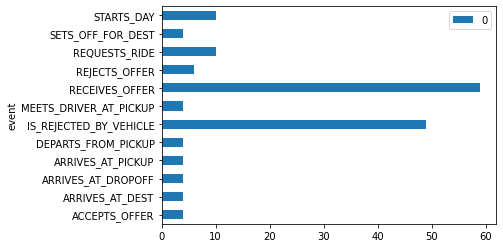

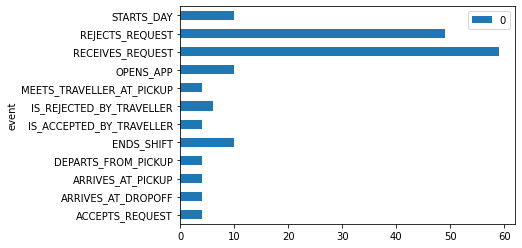

In [10]:
sim = simulate(params = params, f_driver_decline = rand_reject2, f_trav_mode = rand_reject2)
df = sim.runs[0].trips.groupby('event').size().to_frame()
df.plot(kind='barh')
df = sim.runs[0].rides.groupby('event').size().to_frame()
df.plot(kind='barh')

---